<a href="https://colab.research.google.com/github/stacjstaton/chronic_absenteeisim_data/blob/main/chronic__absenteeism__data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

try:
    df = pd.read_csv('Data Download Tool.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Data Download Tool.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,School Year,State,NCES LEA ID,LEA,School,NCES SCH ID,Data Group,Data Description,Value,Denominator,Numerator,Population,Subgroup,Characteristics,Age/Grade,Academic Subject,Program Type,Outcome
0,2022-2023,ALABAMA,NaN,NaN,NaN,NaN,648,Unduplicated number of English learners served...,38203,NaN,NaN,English Learners,All Students in SEA,NaN,NaN,NaN,NaN,NaN
1,2022-2023,ALABAMA,NaN,NaN,NaN,NaN,648,Unduplicated number of English learners served...,3808,NaN,NaN,English Learners,NaN,NaN,Kindergarten,NaN,NaN,NaN
2,2022-2023,ALABAMA,NaN,NaN,NaN,NaN,648,Unduplicated number of English learners served...,3996,NaN,NaN,English Learners,NaN,NaN,Grade 1,NaN,NaN,NaN
3,2022-2023,ALABAMA,NaN,NaN,NaN,NaN,648,Unduplicated number of English learners served...,3664,NaN,NaN,English Learners,NaN,NaN,Grade 2,NaN,NaN,NaN
4,2022-2023,ALABAMA,NaN,NaN,NaN,NaN,648,Unduplicated number of English learners served...,3548,NaN,NaN,English Learners,NaN,NaN,Grade 3,NaN,NaN,NaN


In [8]:
# Determine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe(include='number'))

# Identify missing values
print("\nMissing Values (Percentage):\n", df.isnull().sum() / len(df) * 100)

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Explore unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{col}':\n{df[col].unique()[:10]}") # Limiting to first 10 to avoid large outputs

# Calculate correlation between numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
if len(numerical_cols) > 1:
    print("\nCorrelation Matrix:\n", df[numerical_cols].corr())
else:
    print("\nNot enough numerical columns to calculate correlation.")

Shape of the DataFrame: (32172, 18)

Data Types:
 School Year          object
State                object
NCES LEA ID         float64
LEA                  object
School               object
NCES SCH ID         float64
Data Group           object
Data Description     object
Value                object
Denominator         float64
Numerator           float64
Population           object
Subgroup             object
Characteristics      object
Age/Grade            object
Academic Subject     object
Program Type         object
Outcome              object
dtype: object

Descriptive Statistics:
          NCES LEA ID   NCES SCH ID    Denominator      Numerator
count   30024.000000  1.974300e+04    8428.000000     934.000000
mean   101627.827871  1.016653e+10    2144.870788   17368.714133
std      1073.664946  1.055428e+08   17095.435739   42673.227255
min    100001.000000  1.000050e+10       1.000000       9.000000
25%    100540.000000  1.006300e+10       3.000000     665.000000
50%    101740.00

**Reasoning**:
The previous code block provided a good overview of the dataset.  Now, I will focus on exploring the 'Value' column, which seems to be a numerical column but is currently of object type.  I'll also investigate the 'Data Description' column to see if it provides insights into the 'Value' column.



In [9]:
# Investigate the 'Value' column, which appears to be numerical but is of object type
print(df['Value'].unique()[:20])  # Examine the first 20 unique values
try:
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    print("\nDescriptive Statistics for 'Value' after conversion:\n", df['Value'].describe())
except Exception as e:
    print(f"\nError converting 'Value' column to numeric: {e}")

# Explore the relationship between 'Value' and 'Data Description'
print("\nFirst 20 rows of 'Data Description' and 'Value':")
display(df[['Data Description', 'Value']].head(20))

['38203' '3808' '3996' '3664' '3548' '3533' '3353' '2858' '2870' '2837'
 '3063' '2264' '1318' '1091' '1665' '230' '160' '196' '134' '121']

Descriptive Statistics for 'Value' after conversion:
 count     12932.000000
mean        353.174286
std        4847.400747
min           0.000000
25%           5.000000
50%          11.000000
75%          30.000000
max      164758.000000
Name: Value, dtype: float64

First 20 rows of 'Data Description' and 'Value':


,Data Description,Value
0,Unduplicated number of English learners served...,38203.0
1,Unduplicated number of English learners served...,3808.0
2,Unduplicated number of English learners served...,3996.0
3,Unduplicated number of English learners served...,3664.0
4,Unduplicated number of English learners served...,3548.0
5,Unduplicated number of English learners served...,3533.0
6,Unduplicated number of English learners served...,3353.0
7,Unduplicated number of English learners served...,2858.0
8,Unduplicated number of English learners served...,2870.0
9,Unduplicated number of English learners served...,2837.0


**Reasoning**:
The 'Value' column has been successfully converted to numeric.  Now, I will investigate the relationship between 'Value' and other numerical columns, specifically 'Denominator' and 'Numerator', and handle potential issues like outliers and missing values in these columns.



               Value    Denominator      Numerator
count   12932.000000    8428.000000     934.000000
mean      353.174286    2144.870788   17368.714133
std      4847.400747   17095.435739   42673.227255
min         0.000000       1.000000       9.000000
25%         5.000000       3.000000     665.000000
50%        11.000000      16.000000    1737.000000
75%        30.000000      84.000000   24277.750000
max    164758.000000  727685.000000  375259.000000


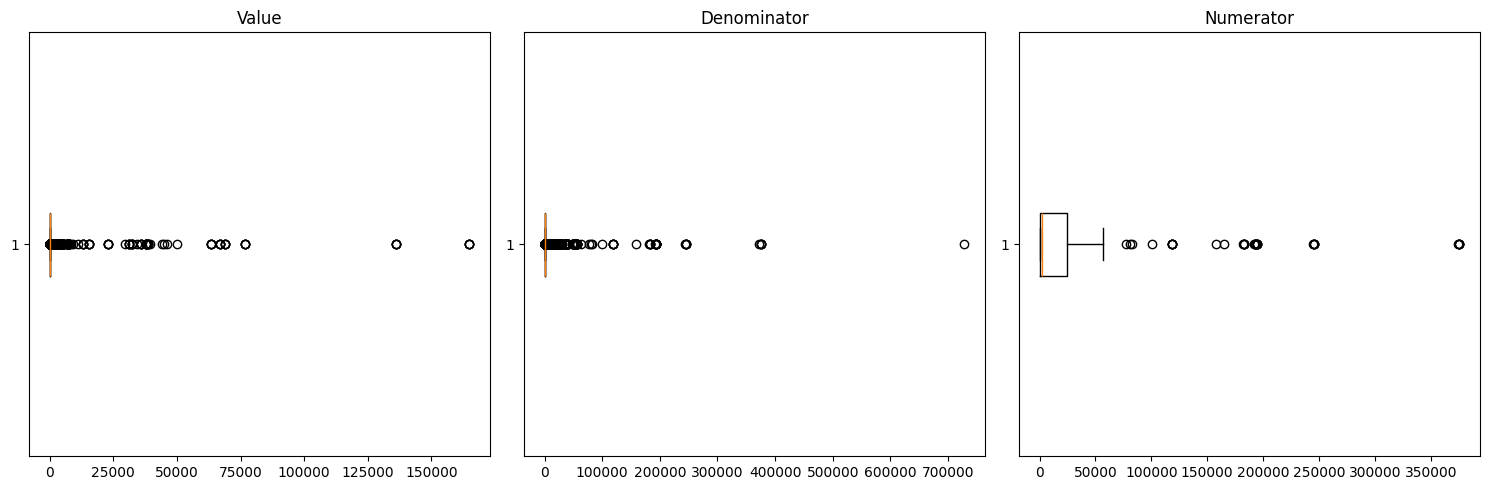

               Value   Denominator      Numerator
count   12932.000000   32172.00000   32172.000000
mean      353.174286     573.69374    2190.811420
std      4847.400747    8799.45570    7726.549414
min         0.000000       1.00000       9.000000
25%         5.000000      16.00000    1737.000000
50%        11.000000      16.00000    1737.000000
75%        30.000000      16.00000    1737.000000
max    164758.000000  727685.00000  375259.000000


In [10]:
# Investigate the relationship between 'Value', 'Denominator', and 'Numerator'
print(df[['Value', 'Denominator', 'Numerator']].describe())

# Check for outliers in 'Value', 'Denominator', and 'Numerator' using box plots
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['Value'].dropna(), vert=False)
plt.title('Value')

plt.subplot(1, 3, 2)
plt.boxplot(df['Denominator'].dropna(), vert=False)
plt.title('Denominator')

plt.subplot(1, 3, 3)
plt.boxplot(df['Numerator'].dropna(), vert=False)
plt.title('Numerator')

plt.tight_layout()
plt.show()


# Handle missing values in 'Denominator' and 'Numerator' (simple imputation for now)
for col in ['Denominator', 'Numerator']:
    df[col] = df[col].fillna(df[col].median())
print(df[['Value', 'Denominator', 'Numerator']].describe())

In [11]:
# Calculate descriptive statistics for numerical columns
numerical_cols = ['Value', 'Denominator', 'Numerator']
print(df[numerical_cols].describe())

# Explore the relationship between 'Value' and categorical columns
categorical_cols = ['Data Description', 'Subgroup Characteristics', 'Age/Grade', 'State']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nSummary statistics of 'Value' for different categories in '{col}':")
        try:
            display(df.groupby(col)['Value'].agg(['mean', 'median', 'std', 'min', 'max']))
        except Exception as e:
            print(f"An error occurred while processing '{col}': {e}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Identify potential outliers in 'Value' (no action taken)
print("\nPotential outliers in 'Value' column (no action taken):")
print("Consider using box plots or IQR to identify and handle outliers.")

# Analyze the distributions of 'Denominator' and 'Numerator' (no action taken)
print("\nDistributions of 'Denominator' and 'Numerator' (no action taken):")
print("Consider histograms or density plots to analyze the distributions and relationship with 'Value'.")

               Value   Denominator      Numerator
count   12932.000000   32172.00000   32172.000000
mean      353.174286     573.69374    2190.811420
std      4847.400747    8799.45570    7726.549414
min         0.000000       1.00000       9.000000
25%         5.000000      16.00000    1737.000000
50%        11.000000      16.00000    1737.000000
75%        30.000000      16.00000    1737.000000
max    164758.000000  727685.00000  375259.000000

Summary statistics of 'Value' for different categories in 'Data Description':


,mean,median,std,min,max
Data Description,,,,,
Academic achievement in reading/language arts statewide assessment,NaN,NaN,NaN,NaN,NaN
Academic achievement in statewide mathematics assessment,NaN,NaN,NaN,NaN,NaN
Academic achievement on science statewide assessment,NaN,NaN,NaN,NaN,NaN
Assessment participation in mathematics statewide assessment,NaN,NaN,NaN,NaN,NaN
Assessment participation in reading/language arts statewide assessment,NaN,NaN,NaN,NaN,NaN
Assessment participation in science statewide assessment,NaN,NaN,NaN,NaN,NaN
Chronic absenteeism--Students absent 10% or more school days,23419.297297,5156.00,37604.241392,112.00,164758.00
Eligible migratory students --12 months (subgroups only),32.982759,18.00,31.556405,1.00,128.00
English Learners Enrolled,49.234471,10.00,638.819829,3.00,39588.00


Column 'Subgroup Characteristics' not found in the DataFrame.

Summary statistics of 'Value' for different categories in 'Age/Grade':


,mean,median,std,min,max
Age/Grade,,,,,
Age 3 through 5 (Not Kindergarten),44.888889,8.0,66.953677,0.0,196.0
Age birth through 2,26.000000,5.0,36.373067,5.0,68.0
Age birth through 5 (not kindergarten),23.076923,4.0,45.316409,3.0,158.0
All Grades,3705.818182,302.0,11302.490538,0.0,37761.0
Grade 1,49.171271,11.0,303.113795,0.0,4121.0
Grade 10,40.191489,10.0,205.880329,0.0,2347.0
Grade 11,30.416667,10.0,136.821076,0.0,1367.0
Grade 12,27.263158,9.0,118.236056,0.0,1127.0
Grade 13,1.000000,1.0,NaN,1.0,1.0



Summary statistics of 'Value' for different categories in 'State':


,mean,median,std,min,max
State,,,,,
ALABAMA,353.174286,11.0,4847.400747,0.0,164758.0



Potential outliers in 'Value' column (no action taken):
Consider using box plots or IQR to identify and handle outliers.

Distributions of 'Denominator' and 'Numerator' (no action taken):
Consider histograms or density plots to analyze the distributions and relationship with 'Value'.


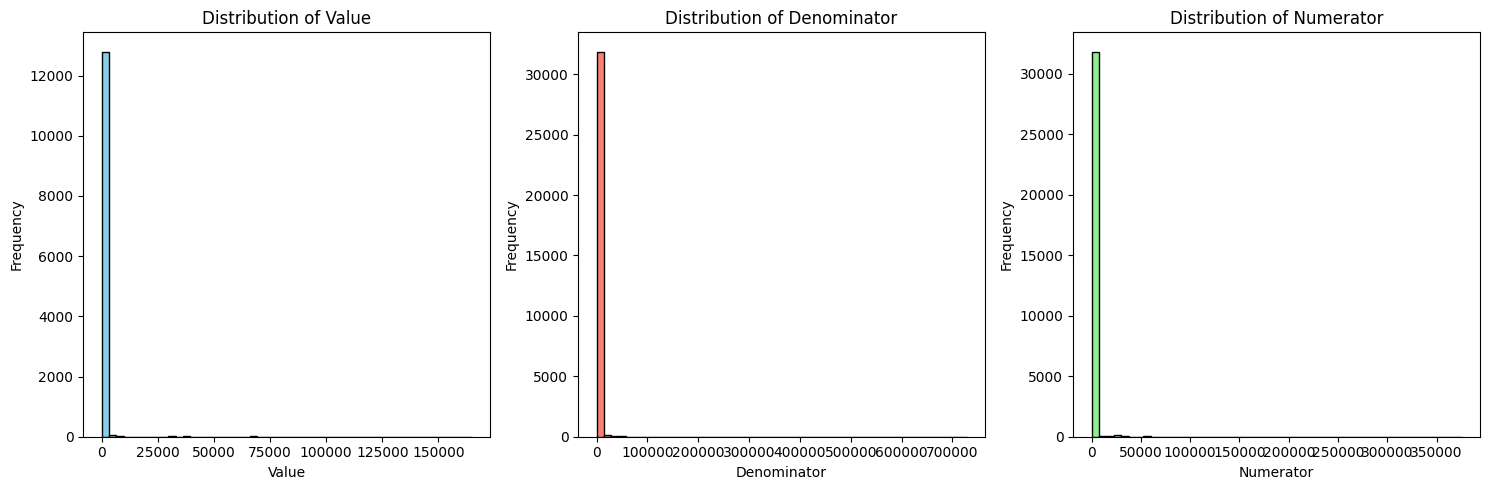

Further investigation of outliers and relationships using box plots and scatter plots is recommended.


In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Value'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Denominator'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Denominator')
plt.xlabel('Denominator')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Numerator'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Numerator')
plt.xlabel('Numerator')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Further analysis for outliers and relationship between Value and Denominator/Numerator
print("Further investigation of outliers and relationships using box plots and scatter plots is recommended.")

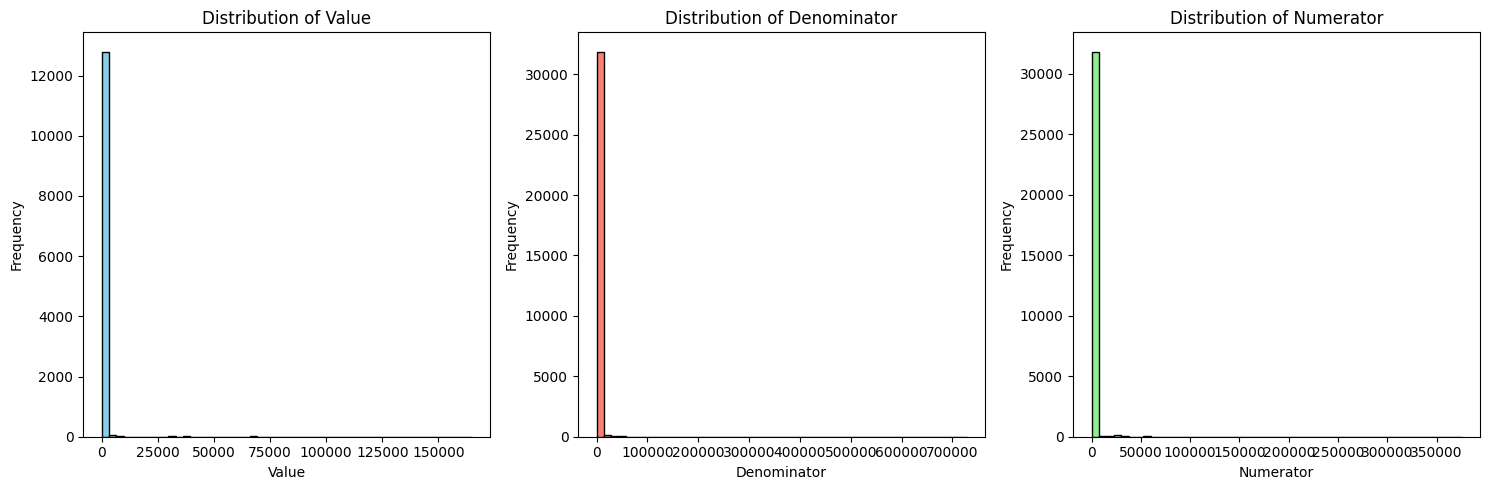

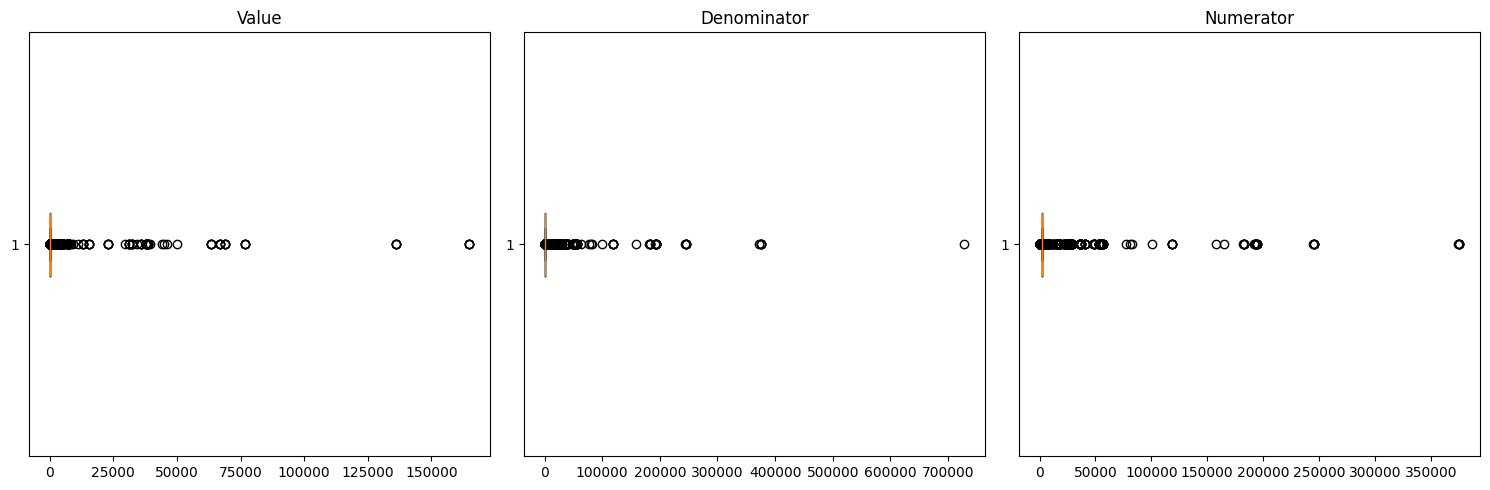

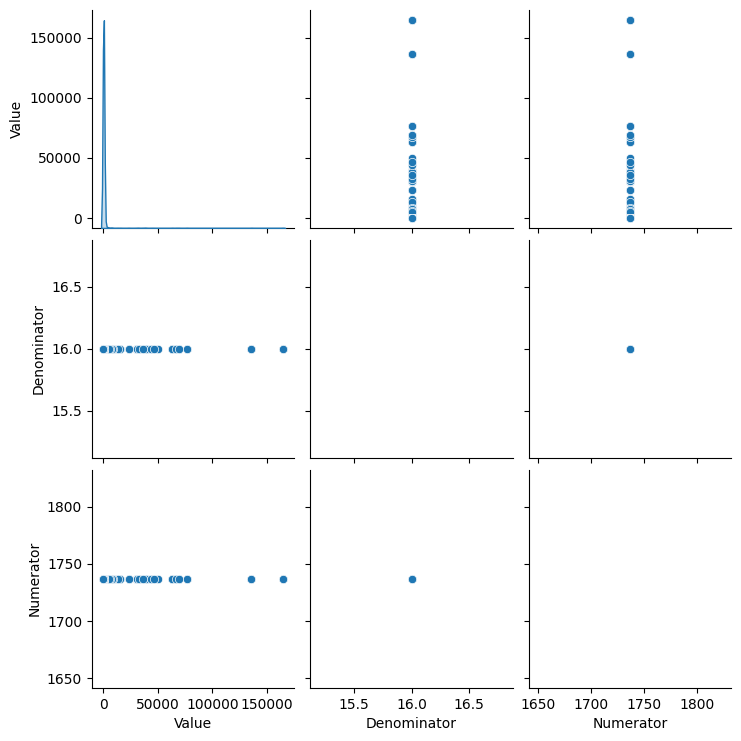

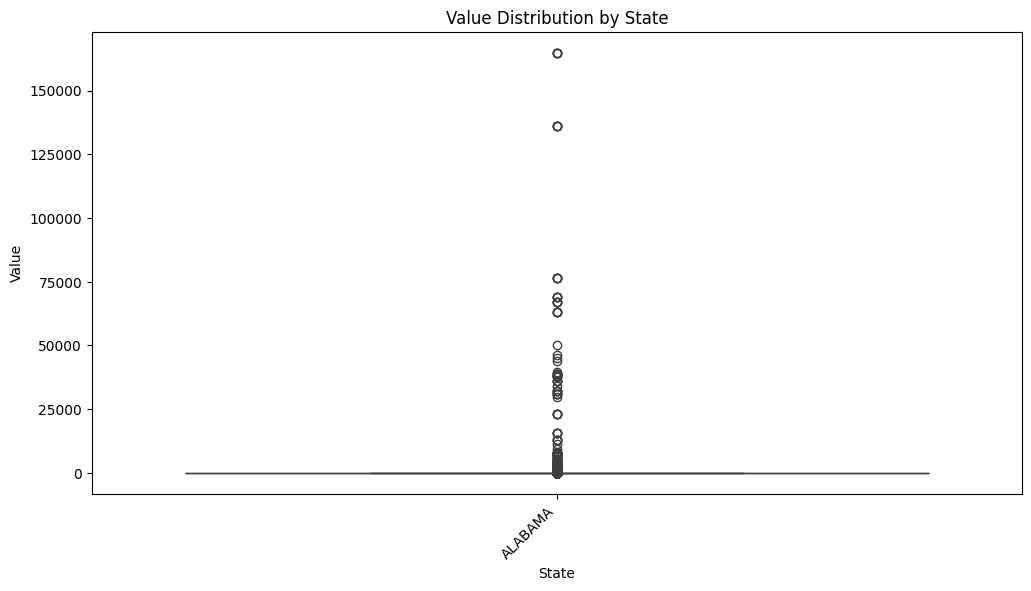

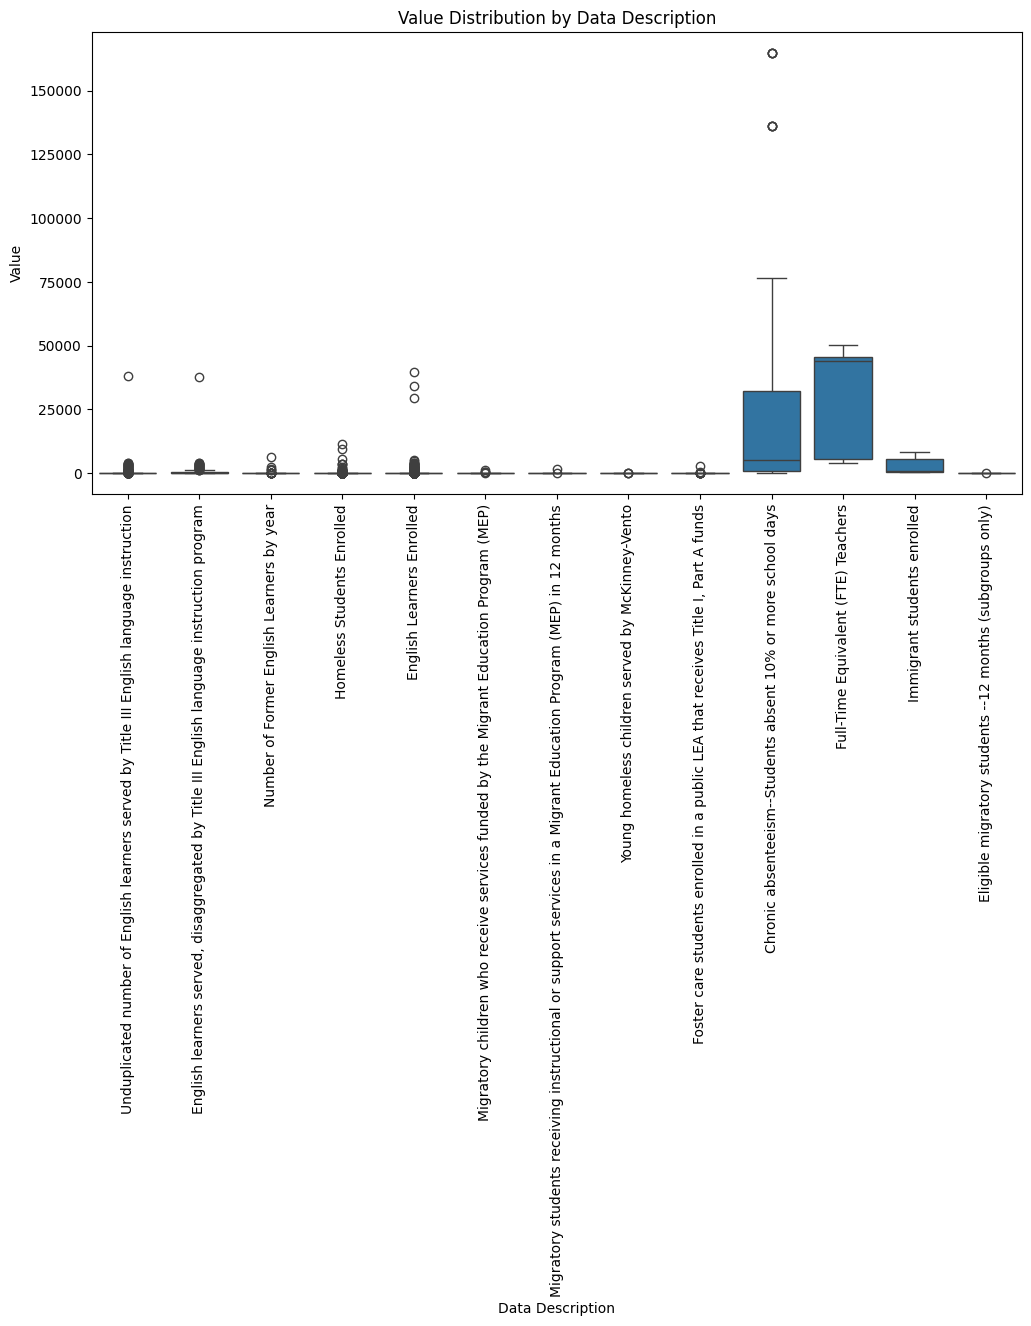

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['Value'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Denominator'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Denominator')
plt.xlabel('Denominator')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Numerator'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Numerator')
plt.xlabel('Numerator')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['Value'].dropna(), vert=False)
plt.title('Value')

plt.subplot(1, 3, 2)
plt.boxplot(df['Denominator'].dropna(), vert=False)
plt.title('Denominator')

plt.subplot(1, 3, 3)
plt.boxplot(df['Numerator'].dropna(), vert=False)
plt.title('Numerator')

plt.tight_layout()
plt.show()

# Scatter plot matrix
sns.pairplot(df[['Value', 'Denominator', 'Numerator']].dropna(), diag_kind='kde')
plt.show()

# Relationship between 'Value' and categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Value', data=df.dropna(subset=['State', 'Value']))
plt.xticks(rotation=45, ha='right')
plt.title('Value Distribution by State')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Data Description', y='Value', data=df.dropna(subset=['Data Description', 'Value']))
plt.xticks(rotation=90)
plt.title('Value Distribution by Data Description')
plt.show()

## Summary:

### 1. Q&A

The provided analysis does not explicitly pose questions. However, the analysis implicitly aims to answer questions about the dataset's characteristics, key variable distributions, potential outliers, and relationships between variables.


### 2. Data Analysis Key Findings

* **Data Quality:** The dataset contains a substantial number of missing values (e.g., 'Characteristics', 'Academic Subject', 'Program Type', and 'Outcome' have over 80% missing data).  975 duplicate rows were identified.  The 'Value', 'Denominator', and 'Numerator' columns, initially of object type, were converted to numeric, with some errors coerced to NaN.  Missing values in 'Denominator' and 'Numerator' were imputed with their respective medians.
* **Variable Distributions:**  The 'Value' column exhibits a large range and standard deviation, suggesting potential outliers, confirmed by histograms and box plots. 'Denominator' and 'Numerator' also display a wide range of values, with their own potential outliers.
* **Relationships:** The analysis explored the relationship between 'Value' and categorical variables like 'State' and 'Data Description' using group-wise summary statistics and boxplots. The 'Subgroup Characteristics' column, initially included in the analysis plan, was not found in the DataFrame. Further investigation into the relationships between 'Value', 'Denominator', and 'Numerator', using scatter plots, was recommended but not carried out.


### 3. Insights or Next Steps

* **Address Data Quality Issues:** Prioritize handling missing data and duplicate rows. Investigate the cause of missing data and consider more sophisticated imputation methods or removal of incomplete records, depending on the analysis goals.
* **Investigate Outliers:**  Further analyze and address outliers in the 'Value', 'Denominator' and 'Numerator' columns.  Determine if these are errors or genuine extreme values, and decide on an appropriate treatment strategy (e.g., removal, transformation, or capping).  Explore the relationships between 'Value', 'Denominator' and 'Numerator' with visualizations (box plots and scatterplots) and statistical tests.
